<a href="https://colab.research.google.com/github/codebreaker0511/emotisense_240775/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

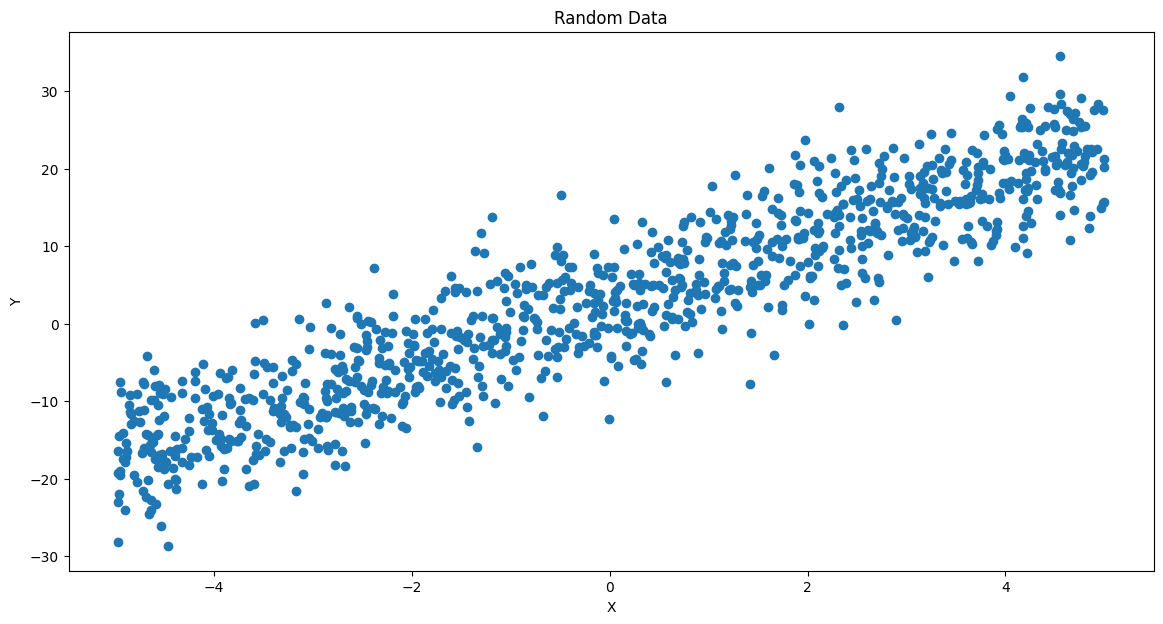

In [ ]:
# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5 # X in range (-5, 5)
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n) #Y is generated from the equation: Y = 4X + 3 + noise where noise is Gaussian with mean 0 and std deviation 5.

plt.figure(figsize=(14,7))
plt.scatter(
    X,
    Y
)
plt.title("Random Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


4.0017369889696175 2.9076076224525256



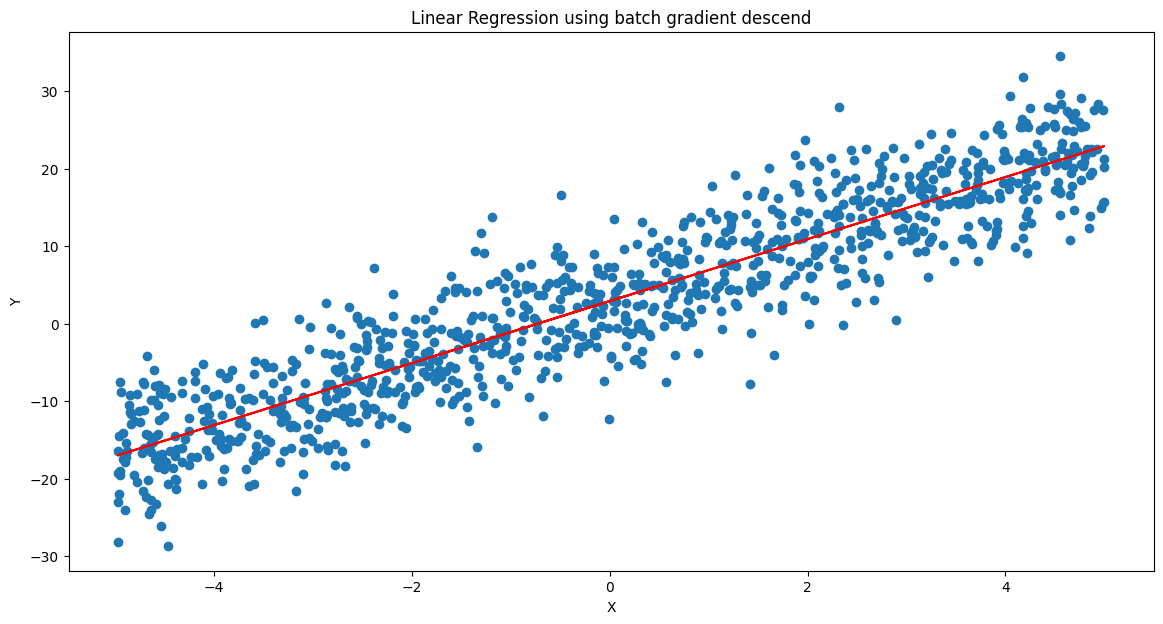

In [ ]:
def Y_based_on_X(x,a,b):
  return a*x +b



#define your descend function here
def B_G_descend(x, y, max_iters=10000, epsilon=1e-6):
    a = 0
    b = 0
    l = 0.01
    x = np.array(x).flatten()
    y = np.array(y).flatten()
    n = len(x)

    for i in range(max_iters):
        y_pred = Y_based_on_X(x, a, b)

        da = (2 / n) * np.sum(x * (y_pred - y))
        db = (2 / n) * np.sum(y_pred - y)

        a_new = a - l * da
        b_new = b - l * db


        if abs(a_new - a) < epsilon and abs(b_new - b) < epsilon:
            break

        a, b = a_new, b_new

    return a, b

a, b = B_G_descend(X, Y) # Batch gradient descend
print(a,b)
print()

plt.figure(figsize=(14,7))
plt.scatter(
    X,
    Y
)
# Here i am plotting the predicted line based on linear regression model using batch gradient descend.
plt.plot(X,Y_based_on_X(X,a,b),c = "red")
plt.title("Linear Regression using batch gradient descend")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

3.9701548557941133 2.8577704760840192



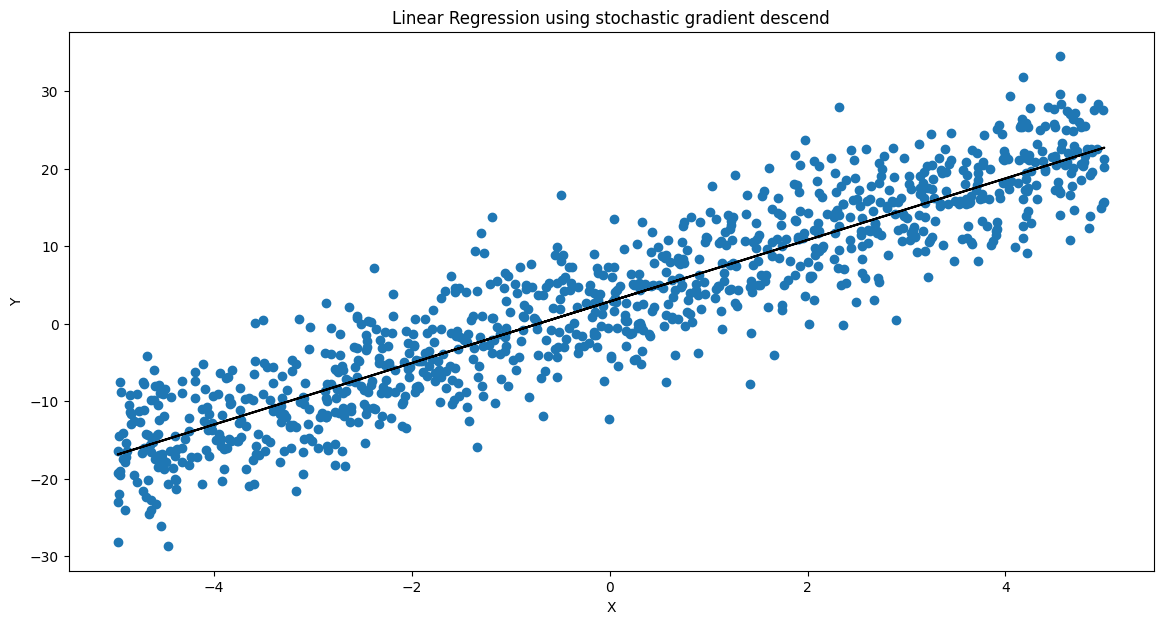

In [ ]:
def Y_based_on_X(x, u, v):
    return u * x + v

def S_G_descend(x, y, max_iters=10000, epsilon=1e-6):
    a = 0
    b = 0
    l = 0.01  # learning rate
    x = np.array(x).flatten()
    y = np.array(y).flatten()
    n = len(x)
    m = 100  # mini-batch size

    for i in range(max_iters):
        indices = np.random.choice(n, size=m, replace=False)
        x_batch = x[indices]
        y_batch = y[indices]

        y_pred = Y_based_on_X(x_batch, a, b)

        da = (2 / m) * np.sum(x_batch * (y_pred - y_batch))
        db = (2 / m) * np.sum(y_pred - y_batch)

        a_new = a - l * da
        b_new = b - l * db

        if abs(a_new - a) < epsilon and abs(b_new - b) < epsilon:
            break

        a, b = a_new, b_new

    return a, b

u,v = S_G_descend(X, Y)
print(u,v)
print()

plt.figure(figsize = (14,7))
plt.scatter(
    X,
    Y
)

plt.plot(X,Y_based_on_X(X,u,v),c = "black")
plt.title("Linear Regression using stochastic gradient descend")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()




#SGD and BGD almost have similar value of the weights or parameters.

In [ ]:
# Closed form SOlution
# Go through this code. This code is just for learning the closed form solution
#This closed-form solution snippet implements Ordinary Least Squares (OLS) linear regression using matrix algebra, also known as the Normal Equation

X_0 = []
for i in range(len(X)):
  X_0.append((1,X[i]))
X = np.matrix(X_0)
Y = np.matrix(Y)
beta = (X.T*X).I*X.T*Y.T

beta

matrix([[2.90765755],
        [4.0017369 ]])

NOTE:-
1. As n increases, the accuracy improves and the error decreases.

As you can see the values that we get for the model are extremely close to the 3 and 4 parameters that we initially set up.

TO TRY:
1. Try varying n and see how that affects the accuracy.
2. Implement the same using GD.
3. Implement the same using SGD with m = 100 and n = 1000.